# TP images: transformations 2D et interpolation
## SSII - 2020-21
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [1]:
%matplotlib notebook

In [2]:
from skimage import io
from skimage import data
from skimage import transform
import numpy as np
from matplotlib import pyplot as plt

## Image issue de la bibliothèque scikit-image

In [3]:
img = data.coffee() #io.imread('/home/lingrand/2020-11-24-couvert.jpg') #data.coffee()
# on peut sauver une image afin de la visualiser dans un autre outil
io.imsave("coffee.png",img)

In [4]:
print(img.shape)

(400, 600, 3)


<IPython.core.display.Javascript object>


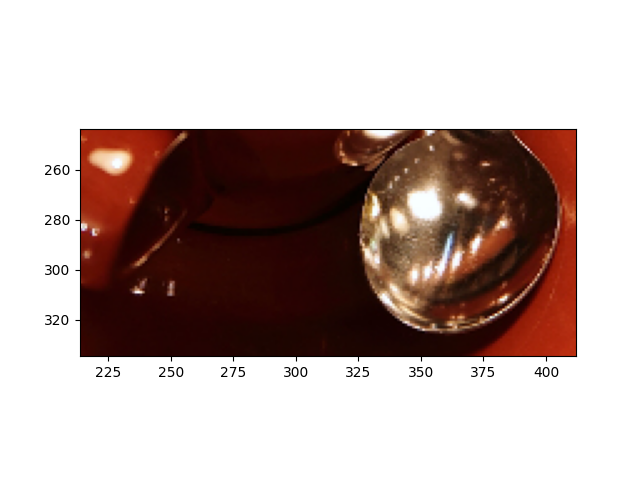

In [5]:
plt.imshow(img)

On va s'intéresser à la visualisation de l'image dans sa taille réelle (1 pixel de l'écran = 1 pixel de l'image). La fonction 'figimage' devrait le permettre mais dans un notebook jupyter, on est dépendant du dpi lié au butineur.

<IPython.core.display.Javascript object>


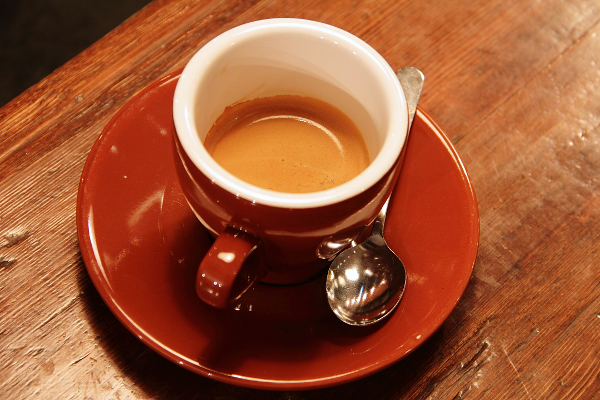

In [7]:
fig,ax = plt.subplots()
fig.figimage(img, resize=True)
plt.show()

Si vous avez utilisé "%matplotlib inline" ou si le facteur d'échelle de votre butineur est trop petit (view/zoom), il manque malheureusement une partie de l'image.

In [8]:
import math
# calcul du dpi pour mon écran
# 1920x1080 et 27 pouces
print('diagonale en pixels ', math.sqrt(1920**2+1080**2))
dpi = math.sqrt(1920**2+1080**2)/27
print('dpi =',dpi)

diagonale en pixels  2202.9071700822983
dpi = 81.58915444749253


Un dpi de 82 devrait convenir mais c'est sans compter la transformation effectuée par le butineur.

<IPython.core.display.Javascript object>


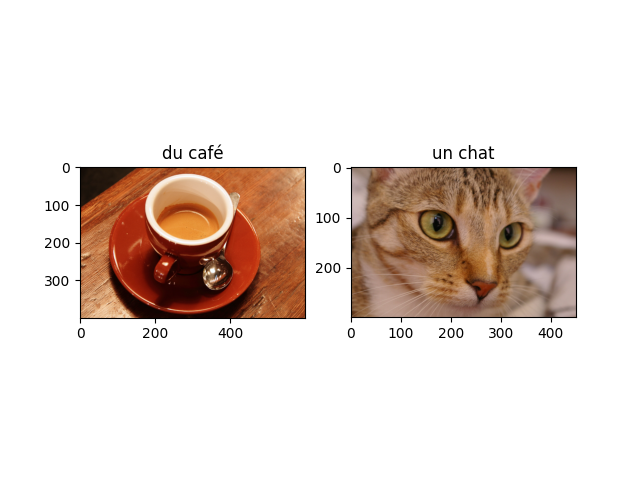

In [12]:
#une figure avec 2 images
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(data.coffee())
ax[0].title.set_text('du café')
ax[1].imshow(data.chelsea())
ax[1].title.set_text('un chat')

## Rotation

La rotation est décrite dans la documentation de <a href="https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rotate">skimage.transform.rotate</a>. Quel est le centre de rotation par défaut? Dans quel unité les angles sont-ils définis?

Affichez une image ainsi que sa rotation d'un angle de 30 degrés (sens anti-horaire) autour du centre de l'image.

<IPython.core.display.Javascript object>


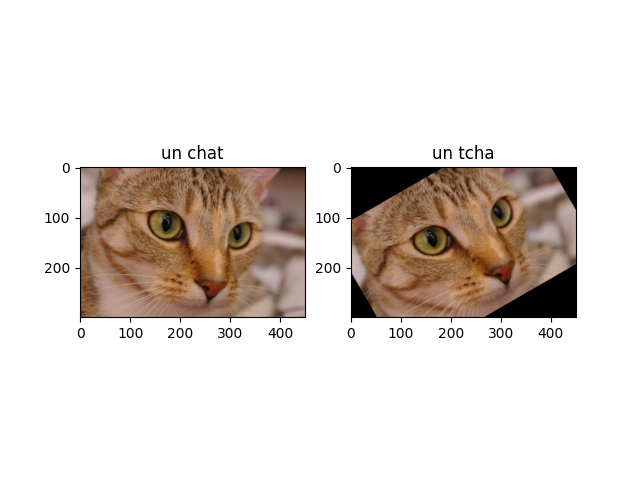

In [15]:
# à vous de jouer
imRot30 = transform.rotate(data.chelsea(), 30.0)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(data.chelsea())
ax[0].title.set_text('un chat')
ax[1].imshow(imRot30)
ax[1].title.set_text('un tcha')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


<IPython.core.display.Javascript object>


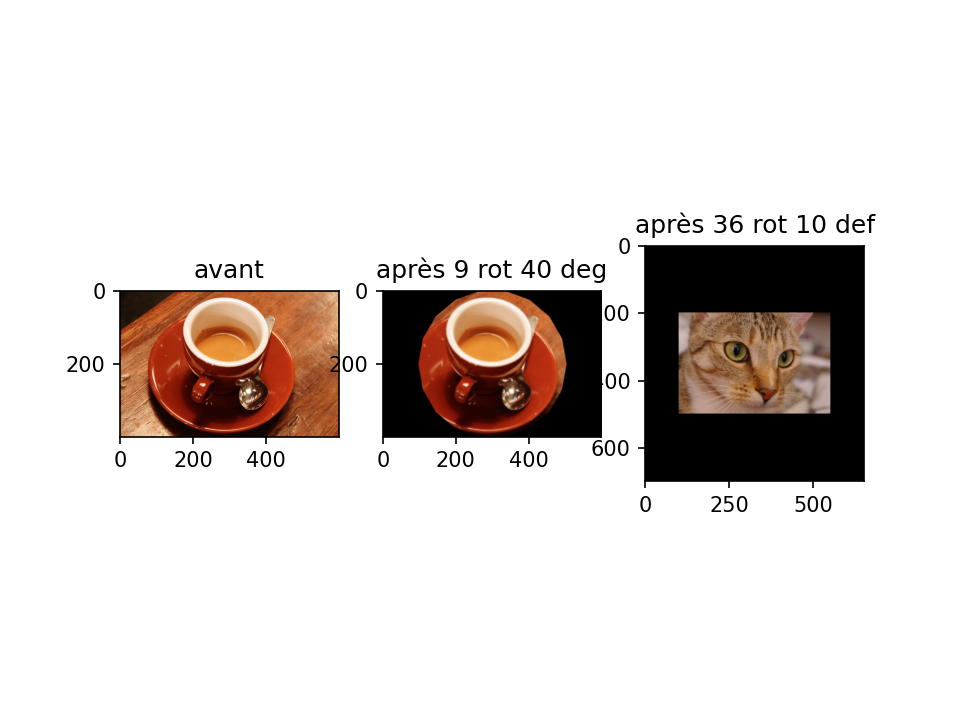

In [17]:
# 9 rotations de 40 degrés
imgRot360 = img.copy()
imgRot360bis = img.copy()
for i in range(9):
    imgRot360 = transform.rotate(imgRot360, 40.0)
for i in range(36):
    imgRot360bis = transform.rotate(imgRot360bis, 10.0)
io.imsave('imgRot360.png',imgRot360)
io.imsave('imgRot360bis.png',imgRot360bis)

fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150)
ax = axes.ravel()
ax[0].imshow(img)
ax[0].title.set_text('avant')
ax[1].imshow(imgRot360)
ax[1].title.set_text('après 9 rot 40 deg')
ax[2].imshow(imgRot360bis)
ax[2].title.set_text('après 36 rot 10 def')

### prise en compte des rognages de bords

Pour cela, vous pourriez plonger l'image dans une plus grande image carrée.

<IPython.core.display.Javascript object>


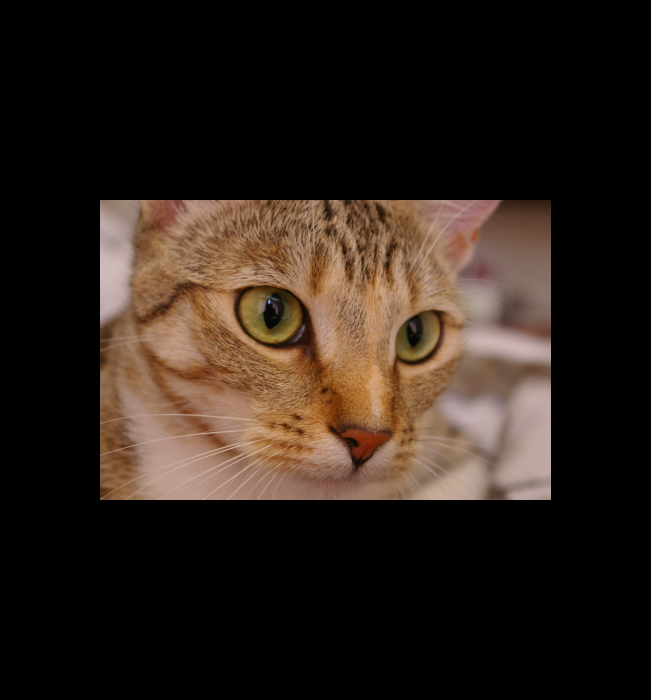

In [32]:
# vous pouvez vous inspirer de ce code en l'adaptant
img= data.chelsea()
h,w,c = img.shape
paddedImg = np.pad(img,((200,200),(100,100),(0,0)),mode='constant', constant_values=(0, 0))
fig,ax = plt.subplots()
fig.figimage(paddedImg, resize=True)
plt.imshow(paddedImg)

In [30]:
imgRot360 = paddedImg.copy()
imgRot360bis = paddedImg.copy()
for i in range(9):
    imgRot360 = transform.rotate(imgRot360, 40.0)
for i in range(36):
    imgRot360bis = transform.rotate(imgRot360bis, 10.0)

<IPython.core.display.Javascript object>


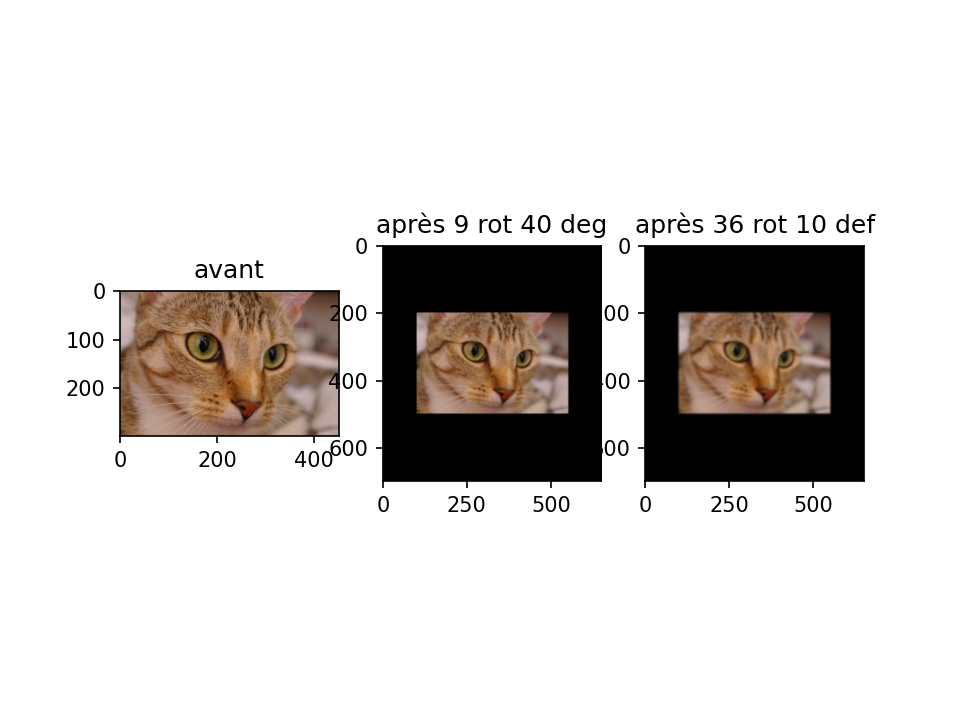

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150)
ax = axes.ravel()
ax[0].imshow(img)
ax[0].title.set_text('avant')
ax[1].imshow(imgRot360)
ax[1].title.set_text('après 9 rot 40 deg')
ax[2].imshow(imgRot360bis)
ax[2].title.set_text('après 36 rot 10 def')

### prise en compte du mode d'interpolation

Dans la documentation, il est précisé, pour le paramètre 'order', entier, optionnel: 

The order of interpolation. The order has to be in the range 0-5:

- 0: Nearest-neighbor
- 1: Bi-linear (default)
- 2: Bi-quadratic
- 3: Bi-cubic
- 4: Bi-quartic
- 5: Bi-quintic

Default is 0 if image.dtype is bool and 1 otherwise.



La documentation de scikit-learn ne donne pas beaucoup d'information sur les modes d'interpolation. En fonction du cours, tester les différents ordres 3, 4 et 5.

- Qu'apportent les modes 4 et 5 par rapport à 3 ?
- Selon vous, de quel ordre 3 s'agit-il ?


<IPython.core.display.Javascript object>


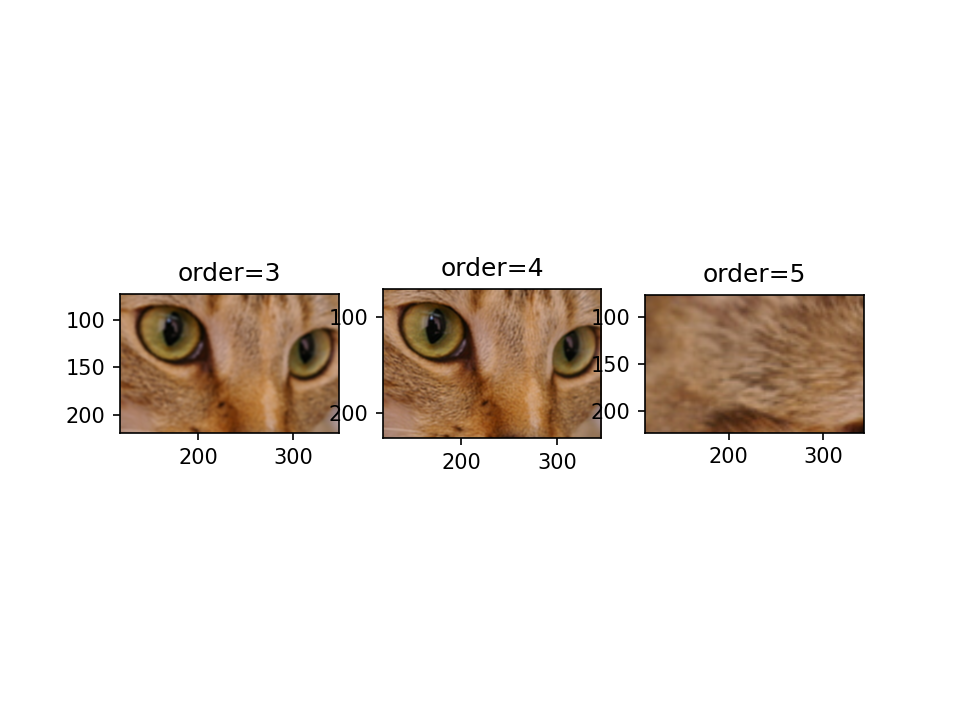

In [36]:
# à vous de jouer
imgRot3 = data.chelsea()
imgRot4 = data.chelsea()
imgRot5 = data.chelsea()
for i in range(36):
    imgRot3 = transform.rotate(imgRot3, 10.0, order=3)
for i in range(36):
    imgRot4 = transform.rotate(imgRot4, 10.0, order=4)
for i in range(36):
    imgRot5 = transform.rotate(imgRot5, 10.0, order=5)
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=150)
ax = axes.ravel()
ax[0].imshow(imgRot3)
ax[0].title.set_text('order=3')
ax[1].imshow(imgRot4)
ax[1].title.set_text('order=4')
ax[2].imshow(imgRot5)
ax[2].title.set_text('order=5')

## Changement d'échelle

Que choisir pour le changement d'échelle: <a href="https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.rescale">rescale</a> ou <a href="https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize">resize</a>?

Attention, pour la fonction skimage.transform.rescale, si vos images ne sont pas en niveaux de gris (e.g. couleur), il faut spécifier qu'il y a plusieurs canaux:

image2 = skimage.transform.rescale(image, 2.4, multichannel=True)

/tmp/ipykernel_4396/469392416.py:3: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image2 = transform.rescale(img, 2.4, multichannel=True)


<IPython.core.display.Javascript object>


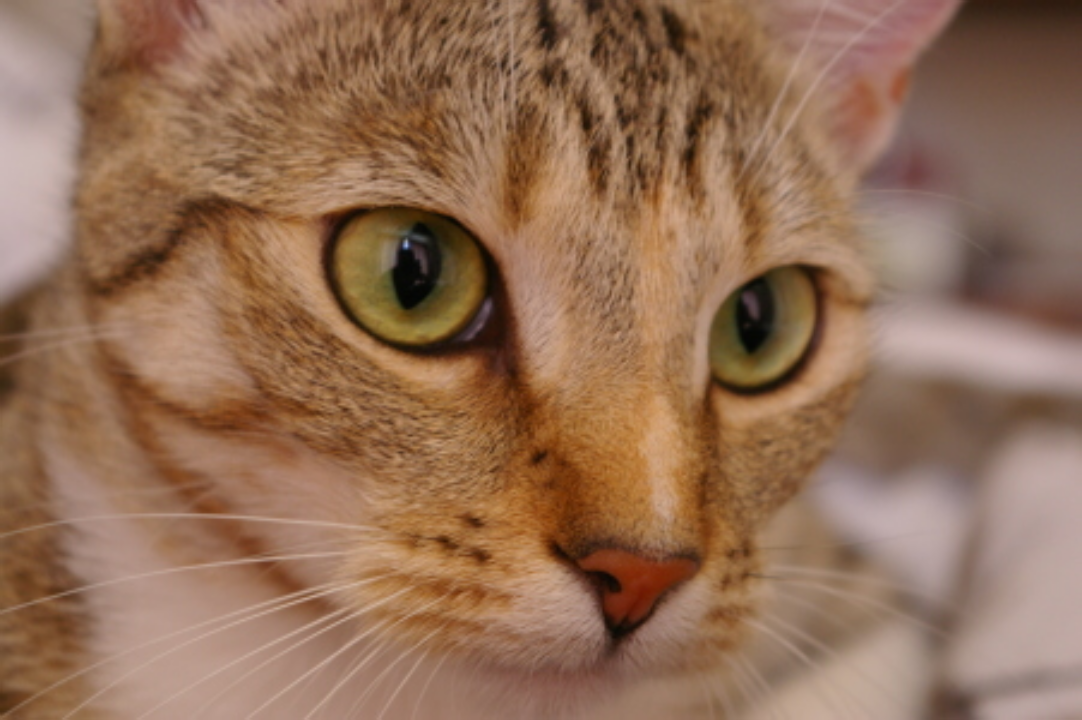

In [39]:
# à vous de jouer
# Il faut choisir rescale car le seul paramètre à passer est l'échelle
image2 = transform.rescale(img, 2.4, multichannel=True)
fig,ax = plt.subplots()
fig.figimage(image2, resize=True)
plt.imshow(image2)

Vous pouvez également tester différentes <a href="https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.AffineTransform">transformations afffines</a>.